<a href="https://colab.research.google.com/github/MrCat2357/Principios-de-Imageamento-Digital/blob/main/Q4_1%C2%AA_lista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VAMOS COMEÇAR COM A CONVERSÃO DE RGB PARA CMYK PARA
PEGARMOS A INSPIRAÇÃO DA COISA

In [ ]:
#VERIFICANDO SE A IMAGEM É RGB OU CMYK

from PIL import Image

def get_image_mode(image_path):
    # Abrir a imagem
    img = Image.open(image_path)

    # Obter a modalidade de cor da imagem
    mode = img.mode

    return mode

# Caminho da imagem
image_path = "/content/pao_de_açucar.png"  # Insira o caminho para sua imagem aqui

# Obter a modalidade de cor da imagem
image_mode = get_image_mode(image_path)

# Imprimir a modalidade de cor
print("Modalidade de cor da imagem:", image_mode)

Modalidade de cor da imagem: RGB


In [ ]:
#CONVERTENDO A IMAGEM DE RGB PARA CMYK

from PIL import Image

def rgb_to_cmyk(r, g, b):
    # Converte valores de RGB para o intervalo de 0 a 1
    r /= 255.0
    g /= 255.0
    b /= 255.0

    # Calcula os valores de CMY
    c = 1 - r
    m = 1 - g
    y = 1 - b

    # Calcula o valor de K (preto)
    k = min(c, m, y)

    # Se K for 1, então a cor é preta
    if k == 1:
        return 0, 0, 0, 1

    # Calcula os valores de CMYK
    c = (c - k) / (1 - k)
    m = (m - k) / (1 - k)
    y = (y - k) / (1 - k)

    return c, m, y, k

# Abrir imagem
image_path = "/content/pao_de_açucar.png"  # Insira o caminho para sua imagem RGB aqui
img = Image.open(image_path)

# Converter a imagem para modo CMYK
cmyk_img = img.convert('CMYK')

# Salvar a imagem convertida
cmyk_img.save("exemplo_cmyk.jpg")



In [ ]:
#VERIFICANDO NOVAMENTE SE RGB OU CMYK

def get_image_mode(image_path):
    # Abrir a imagem
    img = Image.open(image_path)

    # Obter a modalidade de cor da imagem
    mode = img.mode

    return mode

# Caminho da imagem
image_path = "/content/exemplo_cmyk.jpg"  # Insira o caminho para sua imagem aqui

# Obter a modalidade de cor da imagem
image_mode = get_image_mode(image_path)

# Imprimir a modalidade de cor
print("Modalidade de cor da imagem:", image_mode)

Modalidade de cor da imagem: CMYK


PROGRAMA CUJO INPUT É UMA IMAGEM E UMA MATRIZ, E O OUTPUT É A IMAGEM NO NOVO ESPAÇO DE CORES


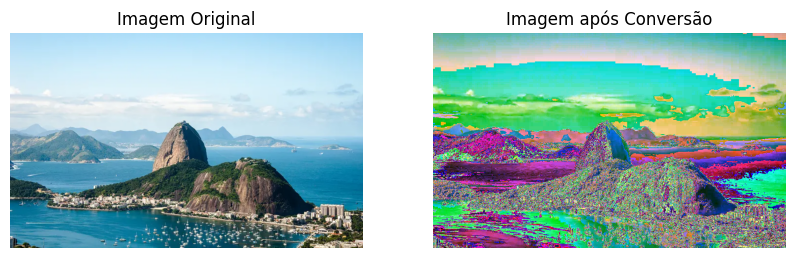

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def apply_color_conversion(image_path, conversion_matrix):
    # Abrir a imagem
    img = Image.open(image_path)

    # Converter a imagem para uma matriz numpy para facilitar a manipulação
    img_array = np.array(img)

    # Obter as dimensões da imagem
    height, width, _ = img_array.shape

    # Aplicar a matriz de conversão a cada pixel
    for i in range(height):
        for j in range(width):
            # Obter o valor do pixel RGB
            rgb = img_array[i, j]

            # Aplicar a matriz de conversão
            new_rgb = np.dot(conversion_matrix, rgb)

            # Atualizar o valor do pixel na matriz da imagem
            img_array[i, j] = new_rgb

    # Criar uma nova imagem a partir da matriz de pixels alterada
    new_img = Image.fromarray(img_array.astype('uint8'))

    return new_img

# Definir a matriz de conversão (substitua esta matriz pela sua própria)
conversion_matrix = np.array([
    [5, 0, 0],
    [0, 2, 0],
    [0, 0, 9]
])

# Caminho da imagem de entrada
image_path = "/content/pao_de_açucar.png"  # Insira o caminho para sua imagem aqui

# Abrir a imagem original
original_img = Image.open(image_path)

# Aplicar a conversão de cor
new_image = apply_color_conversion(image_path, conversion_matrix)

# Salvando a nova imagem
new_image.save("apos_conversao.jpg")

# Visualizar as imagens antes e depois da conversão
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_img)
axes[0].set_title('Imagem Original')
axes[0].axis('off')
axes[1].imshow(new_image)
axes[1].set_title('Imagem após Conversão')
axes[1].axis('off')
plt.show()




AGORA FAREMOS O PROCESSO INVERSO, OU SEJA, INVERTER A MATRIZ A PARA RETORNAR A IMG ORIGINAL

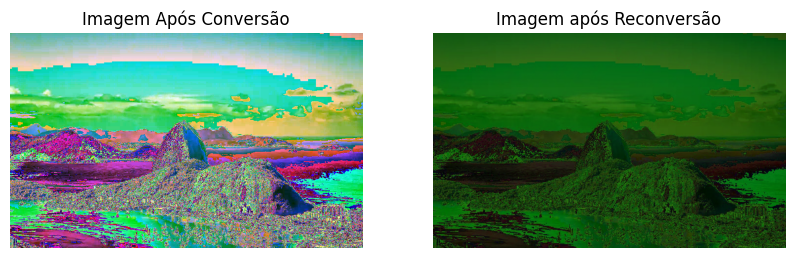

In [ ]:
image_path = "/content/apos_conversao.jpg"

#Invertendo a matriz A de conversão
matriz_inversa = np.linalg.inv(conversion_matrix)

#Aplicando a nova conversão
retornando = apply_color_conversion(image_path, matriz_inversa)

# Visualizar antes e depois
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(new_image)
axes[0].set_title('Imagem Após Conversão')
axes[0].axis('off')
axes[1].imshow(retornando)
axes[1].set_title('Imagem após Reconversão')
axes[1].axis('off')
plt.show()

A CONVERSÃO INVERSA NÃO FUNCIONA PELA PERDA DE INFORMAÇÃO

A perda de informação ocorre durante o processo de conversão de cores, devido às limitações dos espaços de cores e às transformações aplicadas aos pixels da imagem.

Ao converter uma imagem de um espaço de cores para outro, como de RGB para outro espaço de cores definido pela matriz de conversão, pode haver várias fontes de perda de informação:

    Arredondamento e truncamento: Durante a conversão, os cálculos podem resultar em valores fracionários. Ao arredondar ou truncar esses valores para inteiros de 0 a 255 (no caso de imagens de 8 bits por canal), ocorre uma perda de precisão que pode afetar a fidelidade da cor.

    Limitações do espaço de cores: Cada espaço de cores tem sua própria gama de cores disponíveis. Quando você converte uma cor de um espaço de cores para outro, pode haver cores na imagem original que não podem ser representadas no novo espaço de cores. Isso resulta em cores sendo aproximadas para as cores mais próximas no novo espaço de cores, o que pode levar a uma perda de detalhes sutis ou nuances na cor.

    Não linearidade da conversão: As transformações de um espaço de cores para outro podem não ser lineares. Isso significa que a relação entre os valores de pixel na imagem original e os valores resultantes na imagem convertida pode não ser direta. Se a relação não for linear, informações adicionais podem ser perdidas ou distorcidas durante a conversão.

    Erro de aproximação: Em alguns casos, a matriz de conversão pode ser uma simplificação ou uma aproximação do verdadeiro processo de conversão de cores. Isso pode introduzir erros na conversão que resultam em uma perda de fidelidade na imagem.